Read the data

In [88]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import ast

In [3]:
c = pd.read_csv("campaigns.csv")
ms = pd.read_csv("marketing_sales.csv")

Overview of data types and variables available

In [4]:
print("campaign data: ")
print(c.columns)
print(c.dtypes)
print(c.head())
print("\nmarketing sales data: ")
print(ms.columns)
print(ms.dtypes)
print(ms.head())

campaign data: 
Index(['utm_campaign_8', 'start_date', 'amount_spent'], dtype='object')
utm_campaign_8     object
start_date         object
amount_spent      float64
dtype: object
           utm_campaign_8        start_date  amount_spent
0     ATPSLBTEC(C)INTQ421  2021-05-11 16:28         70.42
1  CCDBIDBTEC(C)V2INTQ321  2021-01-04 14:12        212.83
2  CCDBMMBTEC(B)V2INTQ221  2021-01-05 12:18        208.39
3  CCDBMMBTEC(B)V2INTQ321  2021-01-06 16:11        105.67
4  CCDBMMBTEC(C)V2INTQ221  2021-01-05 12:18        237.50

marketing sales data: 
Index(['spPEProcessAuditId', 'createDate', 'modifiedDate',
       'spPEProcessStateId', 'entityClassId', 'entityId', 'userIdProcess',
       'storageId', 'data1'],
      dtype='object')
spPEProcessAuditId    float64
createDate             object
modifiedDate           object
spPEProcessStateId    float64
entityClassId         float64
entityId              float64
userIdProcess         float64
storageId             float64
data1                 

Filter out the year and month of each campaign into a new column

In [5]:
c['campaign_name'] = c['utm_campaign_8'].map(lambda x: x[:-4])
c['start_year'] = c['start_date'].map(lambda x: x[:4])
c['start_mth'] = c['start_date'].map(lambda x: x[6:7])

In [6]:
c

,utm_campaign_8,start_date,amount_spent,campaign_name,start_year,start_mth
0,ATPSLBTEC(C)INTQ421,2021-05-11 16:28,70.42,ATPSLBTEC(C)INT,2021,5
1,CCDBIDBTEC(C)V2INTQ321,2021-01-04 14:12,212.83,CCDBIDBTEC(C)V2INT,2021,1
2,CCDBMMBTEC(B)V2INTQ221,2021-01-05 12:18,208.39,CCDBMMBTEC(B)V2INT,2021,1
3,CCDBMMBTEC(B)V2INTQ321,2021-01-06 16:11,105.67,CCDBMMBTEC(B)V2INT,2021,1
4,CCDBMMBTEC(C)V2INTQ221,2021-01-05 12:18,237.50,CCDBMMBTEC(C)V2INT,2021,1
...,...,...,...,...,...,...
303,UAMYEDUB(C)INTQ122,2021-07-30 13:31,259.22,UAMYEDUB(C)INT,2021,7
304,UAPHEDUB(B)INTQ222,2021-09-14 09:40,29.89,UAPHEDUB(B)INT,2021,9
305,UAPHEDUB(C)INTQ222,2021-09-14 09:40,35.30,UAPHEDUB(C)INT,2021,9
306,WISGGNREQ122,2021-07-15 11:32,16.34,WISGGNRE,2021,7


Number of unique marketing campaigns held

In [7]:
print(len(c['campaign_name'].unique()))

217


In [8]:
data_lst = []

for idx in range(ms.index.stop):
    data_lst = list(set([*data_lst, *list(ast.literal_eval(ms['data1'][idx].replace("nan","0")).keys())]))
    
data_lst

['utm_source_7',
 'storageId',
 'purpose_4',
 'country_name_1',
 'utm_campaign_8',
 'persona_3',
 'VisitorId',
 'utm_medium_6',
 'product_interest_5']

For each element in column 'data1', filter them into a new column 

In [9]:
ms.set_index('spPEProcessAuditId')

,createDate,modifiedDate,spPEProcessStateId,entityClassId,entityId,userIdProcess,storageId,data1
spPEProcessAuditId,,,,,,,,
2130210.0,2021-01-01 00:00:22,2021-01-01 00:00:22,426344.0,116210.0,9519.0,4171775.0,413052.0,"{'utm_source_7': 'placeholder', 'persona_3': '..."
2130213.0,2021-01-01 00:48:30,2021-01-01 00:48:30,426345.0,444711.0,8600.0,11847758.0,413053.0,"{'utm_source_7': 'placeholder', 'persona_3': '..."
2130216.0,2021-01-01 01:56:43,2021-01-01 01:56:43,426346.0,116210.0,9519.0,18386324.0,413054.0,"{'utm_source_7': 'placeholder', 'persona_3': '..."
2130220.0,2021-01-01 02:57:44,2021-01-01 02:57:44,426347.0,444711.0,45.0,9451943.0,413055.0,"{'utm_source_7': 'placeholder', 'persona_3': '..."
2130239.0,2021-01-01 08:57:00,2021-01-01 08:57:00,426350.0,444711.0,38.0,18386338.0,413060.0,"{'utm_source_7': 'placeholder', 'persona_3': '..."
...,...,...,...,...,...,...,...,...
2536809.0,2021-11-04 14:12:11,2021-11-04 14:12:11,478043.0,444711.0,1.0,125509335.0,503100.0,{'utm_source_7': 'CMFBGet-into-a-Digital-Caree...
2536817.0,2021-11-04 14:17:56,2021-11-04 14:17:56,478044.0,444711.0,1.0,125509342.0,503101.0,{'utm_source_7': 'CMFBBe-a-Cybersecurity-Engin...
2536834.0,2021-11-04 14:30:13,2021-11-04 14:30:13,478049.0,444711.0,1.0,125509370.0,503106.0,{'utm_source_7': 'CMFBEmergestronger-Business-...


In [10]:
for data in data_lst:
    ms[data]=""

In [11]:
for idx in range(ms.index.stop):
    for data in data_lst:
        ms[data][idx] = ast.literal_eval(ms['data1'][idx].replace('nan','0'))[data]
    #print(idx/ms.index.stop*100,"%")    
    if idx%2000 == 0:
        print('{:.2f}%'.format(idx/ms.index.stop*100))
print('Dataframe is done.')

C:\Users\Calvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.00%
5.64%
11.27%
16.91%
22.55%
28.19%
33.82%
39.46%
45.10%
50.73%
56.37%
62.01%
67.65%
73.28%
78.92%
84.56%
90.19%
95.83%
Dataframe is done.


In [12]:
ms.replace({0:np.nan})

,spPEProcessAuditId,createDate,modifiedDate,spPEProcessStateId,entityClassId,entityId,userIdProcess,storageId,data1,utm_source_7,purpose_4,country_name_1,utm_campaign_8,persona_3,VisitorId,utm_medium_6,product_interest_5
0,2130210.0,2021-01-01 00:00:22,2021-01-01 00:00:22,426344.0,116210.0,9519.0,4171775.0,413052.0,"{'utm_source_7': 'placeholder', 'persona_3': '...",placeholder,General%20Enquiry,Singapore,placeholder,General,6217.0,placeholder,Bundled%20Programme%20-%20Digital%20Marketing%...
1,2130213.0,2021-01-01 00:48:30,2021-01-01 00:48:30,426345.0,444711.0,8600.0,11847758.0,413053.0,"{'utm_source_7': 'placeholder', 'persona_3': '...",placeholder,General%20Enquiry,Singapore,placeholder,General,26154.0,placeholder,General
2,2130216.0,2021-01-01 01:56:43,2021-01-01 01:56:43,426346.0,116210.0,9519.0,18386324.0,413054.0,"{'utm_source_7': 'placeholder', 'persona_3': '...",placeholder,General%20Enquiry,Singapore,placeholder,General,26209.0,placeholder,Bundled%20Programme%20-%20Digital%20Marketing%...
3,2130220.0,2021-01-01 02:57:44,2021-01-01 02:57:44,426347.0,444711.0,45.0,9451943.0,413055.0,"{'utm_source_7': 'placeholder', 'persona_3': '...",placeholder,Register%20Interest,Singapore,placeholder,MERP,26139.0,placeholder,MERP
4,2130239.0,2021-01-01 08:57:00,2021-01-01 08:57:00,426350.0,444711.0,38.0,18386338.0,413060.0,"{'utm_source_7': 'placeholder', 'persona_3': '...",placeholder,Register%20Interest,Singapore,placeholder,IT%20Professionals,21282.0,placeholder,System%20Management
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35474,2536809.0,2021-11-04 14:12:11,2021-11-04 14:12:11,478043.0,444711.0,1.0,125509335.0,503100.0,{'utm_source_7': 'CMFBGet-into-a-Digital-Caree...,CMFBGet-into-a-Digital-CareerVideo6secSGSGUTLR...,NaN,Singapore,CMFBLGSGSGUTLREQ222,NaN,3051.0,Facebook Lead Gen Form,NaN
35475,2536817.0,2021-11-04 14:17:56,2021-11-04 14:17:56,478044.0,444711.0,1.0,125509342.0,503101.0,{'utm_source_7': 'CMFBBe-a-Cybersecurity-Engin...,CMFBBe-a-Cybersecurity-EngineerVideo15secSGSGU...,NaN,Singapore,CMFBLGSGSGUCSREQ222,NaN,3202.0,Facebook Lead Gen Form,NaN
35476,2536834.0,2021-11-04 14:30:13,2021-11-04 14:30:13,478049.0,444711.0,1.0,125509370.0,503106.0,{'utm_source_7': 'CMFBEmergestronger-Business-...,CMFBEmergestronger-Business-AnalyticsVideo6sec...,NaN,Singapore,CMFBLGSGSGUBAREQ222,NaN,13353.0,Facebook Lead Gen Form,NaN
35477,2536838.0,2021-11-04 14:32:04,2021-11-04 14:32:04,478050.0,444711.0,1.0,14384726.0,503107.0,{'utm_source_7': 'CMFBEmergestronger-Business-...,CMFBEmergestronger-Business-AnalyticsStatic-Im...,NaN,Singapore,CMFBLGSGSGUBAREQ222,NaN,26902.0,Facebook Lead Gen Form,NaN


In [13]:
counter = 0
campaign_names = []

for campaign_name in c['utm_campaign_8'].unique():
    if campaign_name in ms['utm_campaign_8'].unique():
        counter += 1
        campaign_names.append(campaign_name)
        
print('{:} campaigns, {:.2f}% marketing campaigns dataset have leads\n'.format(counter, counter/len(c['utm_campaign_8'].unique())*100))
#print("Campaigns for evaluation: ", campaign_names)

299 campaigns, 97.08% marketing campaigns dataset have leads



Check the number of leads per campaign and the average cost of acquisition

In [14]:
df = ms.loc[ms['utm_campaign_8'].isin(campaign_names)]
df

,spPEProcessAuditId,createDate,modifiedDate,spPEProcessStateId,entityClassId,entityId,userIdProcess,storageId,data1,utm_source_7,purpose_4,country_name_1,utm_campaign_8,persona_3,VisitorId,utm_medium_6,product_interest_5
14,2130306.0,2021-01-02 16:11:14,2021-01-02 16:11:14,426369.0,444711.0,9300.0,16952114.0,413088,"{'utm_source_7': 'Email_Inquiry', 'persona_3':...",Email_Inquiry,Register%20Interest,Singapore,EESGGNREQ221,Walk%20In,24121,Email,Walk%20In
17,2130345.0,2021-01-03 11:12:52,2021-01-03 11:12:52,426378.0,444711.0,9100.0,18386566.0,413101,{'utm_source_7': 'BTECBusiness_Students_NewPro...,BTECBusiness_Students_NewProdMsg_MSG,0,International,FBMSGSLBTEC(B)V2INTQ321,0,14344,Business_Students_MSG_SL,0
18,2130348.0,2021-01-03 11:12:56,2021-01-03 11:12:56,426379.0,444711.0,9100.0,18386573.0,413102,{'utm_source_7': 'BTECBusiness_Students_NewPro...,BTECBusiness_Students_NewProdMsgNewImg_MSG,0,International,FBMSGSLBTEC(B)V2INTQ321,0,7260,Business_Students_MSG_SL,0
19,2130351.0,2021-01-03 11:12:59,2021-01-03 11:12:59,426380.0,444711.0,9100.0,18386580.0,413103,{'utm_source_7': 'BTECBusiness_Students_NewPro...,BTECBusiness_Students_NewProdMsg_MSG,0,International,FBMSGSLBTEC(B)V2INTQ321,0,21819,Business_Students_MSG_SL,0
20,2130354.0,2021-01-03 11:13:05,2021-01-03 11:13:05,426381.0,444711.0,9100.0,18386587.0,413104,{'utm_source_7': 'BTECBusiness_Students_NewPro...,BTECBusiness_Students_NewProdMsgNewImg_MSG,0,International,FBMSGSLBTEC(B)V2INTQ321,0,10606,Business_Students_MSG_SL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35474,2536809.0,2021-11-04 14:12:11,2021-11-04 14:12:11,478043.0,444711.0,1.0,125509335.0,503100,{'utm_source_7': 'CMFBGet-into-a-Digital-Caree...,CMFBGet-into-a-Digital-CareerVideo6secSGSGUTLR...,0,Singapore,CMFBLGSGSGUTLREQ222,0,3051,Facebook Lead Gen Form,0
35475,2536817.0,2021-11-04 14:17:56,2021-11-04 14:17:56,478044.0,444711.0,1.0,125509342.0,503101,{'utm_source_7': 'CMFBBe-a-Cybersecurity-Engin...,CMFBBe-a-Cybersecurity-EngineerVideo15secSGSGU...,0,Singapore,CMFBLGSGSGUCSREQ222,0,3202,Facebook Lead Gen Form,0
35476,2536834.0,2021-11-04 14:30:13,2021-11-04 14:30:13,478049.0,444711.0,1.0,125509370.0,503106,{'utm_source_7': 'CMFBEmergestronger-Business-...,CMFBEmergestronger-Business-AnalyticsVideo6sec...,0,Singapore,CMFBLGSGSGUBAREQ222,0,13353,Facebook Lead Gen Form,0
35477,2536838.0,2021-11-04 14:32:04,2021-11-04 14:32:04,478050.0,444711.0,1.0,14384726.0,503107,{'utm_source_7': 'CMFBEmergestronger-Business-...,CMFBEmergestronger-Business-AnalyticsStatic-Im...,0,Singapore,CMFBLGSGSGUBAREQ222,0,26902,Facebook Lead Gen Form,0


In [15]:
count_df = ms.groupby('utm_campaign_8')['spPEProcessAuditId'].count()
count_df = count_df.to_frame()
count_df = count_df.rename(columns={'spPEProcessAuditId':'no_of_leads'})
count_df.reset_index(level=0, inplace=True)
count_df['utm_campaign_8'].loc[0] = "Total"
count_df

C:\Users\Calvin\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,utm_campaign_8,no_of_leads
0,Total,3848
1,ATPDXBBTEC(C)INTQ122,3
2,ATPDXBBTEC(C)INTQ122,1
3,ATPINDOBTEC(B)INTQ122,6
4,ATPINDOBTEC(B)INTQ222,7
...,...,...
510,YTCTWSGSGUGNREQ122,1
511,ZCSGGNREQ121,1
512,e2iEVTSGGNREQ421,7
513,e2iEVTSGGNREQ421,1


In [16]:
c_cost = c.groupby('utm_campaign_8')['amount_spent'].sum()
c_cost = c_cost.to_frame()
c_cost.reset_index(level=0, inplace=True)
c_cost

,utm_campaign_8,amount_spent
0,ATPDXBBTEC(C)INTQ122,32.50
1,ATPINDOBTEC(B)INTQ122,45.70
2,ATPINDOBTEC(B)INTQ222,64.83
3,ATPINDOBTEC(C)INTQ122,147.51
4,ATPMMBTE(C)INTQ222,114.15
...,...,...
303,WISGGNREQ421,4.36
304,YTCTWSGGNREQ321,15.08
305,YTCTWSGSGUGNREQ122,16.31
306,ZCSGGNREQ121,4.61


In [17]:
print("Printing top 20 marketing campaigns with above median outreach and lowest average cost per acquisition: \n")
campaign_df = pd.merge(count_df, c_cost)
campaign_df['avg_cost_of_acquisition'] = campaign_df['amount_spent']/campaign_df['no_of_leads'] 
campaign_df = campaign_df.sort_values(by=['avg_cost_of_acquisition'],ascending=True)
top_50_campaigns = campaign_df.loc[campaign_df['no_of_leads']>campaign_df['no_of_leads'].median()].head(50)
display(top_50_campaigns)

Printing top 20 marketing campaigns with above median outreach and lowest average cost per acquisition: 



,utm_campaign_8,no_of_leads,amount_spent,avg_cost_of_acquisition
237,MCEDMSGGNREQ421,70,232.21,3.317286
99,FBLGPHBTEC(B)V2INTQ221,19,63.10,3.321053
147,FBMSGMMBTEC(B)V2INTQ321,722,2566.46,3.554654
100,FBLGPHBTEC(B)V2INTQ321,850,3024.76,3.558541
154,FBMSGMMBTEC(C)V2INTQ421,34,123.01,3.617941
165,FBMSGSLBTEC(B)V2INTQ421,117,428.73,3.664359
276,RLSGGNREQ421,58,213.42,3.679655
112,FBLGSGCSREQ421,346,1277.44,3.692023
128,FBLGSGGNREQ221,15,57.90,3.860000
109,FBLGSGAIREQ421,186,735.64,3.955054


Check the average cost of acquisition for each class of target group:
'product_interest_5', 
'persona_3', 
'country_name_1', 
'utm_medium_6', 
'utm_source_7', 
'purpose_4

In [37]:
df = ms.loc[ms['utm_campaign_8'].isin(campaign_names)]
to_merge = df[['product_interest_5', 'persona_3', 'country_name_1', 'utm_medium_6', 'utm_source_7','purpose_4','utm_campaign_8']]
campaign_df2 = pd.merge(campaign_df,to_merge)
campaign_df2 = campaign_df2.drop(columns=['no_of_leads','amount_spent'])
campaign_df2 = campaign_df2.replace({0:np.nan})
campaign_df2 = campaign_df2.dropna()
campaign_df2

,utm_campaign_8,avg_cost_of_acquisition,product_interest_5,persona_3,country_name_1,utm_medium_6,utm_source_7,purpose_4
6,MCEDMSGGNREQ421,3.317286,Walk%20In,Walk%20In,Singapore,Mailchimp_EDM,ClosedLost_Quiz_CTW,Register%20Interest
7,MCEDMSGGNREQ421,3.317286,Walk%20In,Walk%20In,International,Mailchimp_EDM,ClosedLost_Quiz_CTW,Register%20Interest
8,MCEDMSGGNREQ421,3.317286,Walk%20In,Walk%20In,International,Mailchimp_EDM,ClosedLost_Quiz_CTW,Register%20Interest
9,MCEDMSGGNREQ421,3.317286,Walk%20In,Walk%20In,Singapore,Mailchimp_EDM,ClosedLost_Quiz_CTW,Register%20Interest
10,MCEDMSGGNREQ421,3.317286,Walk%20In,Walk%20In,International,Mailchimp_EDM,ClosedLost_Quiz_CTW,Register%20Interest
...,...,...,...,...,...,...,...,...
25201,EPSGSGUGNREQ122,14.253333,General,General,Singapore,SSG_SFMEvent,SSG_SFM_Flyer_CTW,General%20Enquiry
25202,EPSGSGUGNREQ122,14.253333,General,General,Singapore,SSG_SFMEvent,SSG_SFM_Flyer_CTW,General%20Enquiry
25215,JCCLSGGNREQ122,15.600000,Walk%20In,Walk%20In,Singapore,JobsCentral,Course_Listing,Register%20Interest
25216,FBCTWMYADLBCINTQ122,15.710000,Digital%20Upskilling%20Claas,Retail,International,cpc,FB,Digital%20Upskilling%20Claas%20Interest


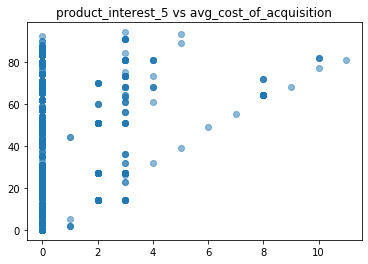

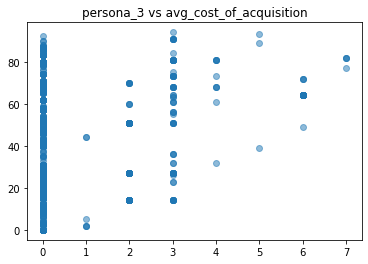

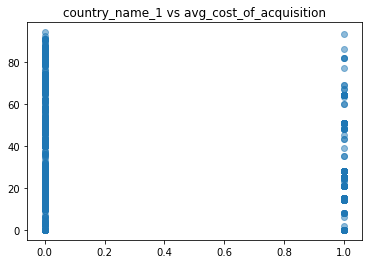

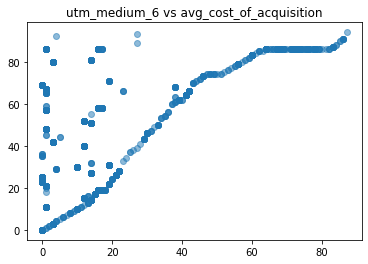

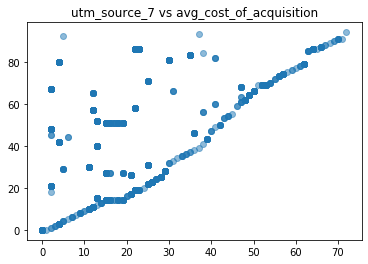

In [108]:
plt.scatter(campaign_df2['product_interest_5'],campaign_df2['avg_cost_of_acquisition'],alpha=0.5)
plt.title('product_interest_5 vs avg_cost_of_acquisition')
plt.show()
plt.scatter(campaign_df2['persona_3'],campaign_df2['avg_cost_of_acquisition'], alpha=0.5)
plt.title('persona_3 vs avg_cost_of_acquisition')
plt.show()
plt.scatter(campaign_df2['country_name_1'],campaign_df2['avg_cost_of_acquisition'], alpha=0.5)
plt.title('country_name_1 vs avg_cost_of_acquisition')
plt.show()
plt.scatter(campaign_df2['utm_medium_6'],campaign_df2['avg_cost_of_acquisition'], alpha=0.5)
plt.title('utm_medium_6 vs avg_cost_of_acquisition')
plt.show()
plt.scatter(campaign_df2['utm_source_7'],campaign_df2['avg_cost_of_acquisition'], alpha=0.5)
plt.title('utm_source_7 vs avg_cost_of_acquisition')
plt.show()